<a href="https://colab.research.google.com/github/SaraElizabethGarciaCajero/Colab/blob/main/Act_19_Garc%C3%ADa_Cajero_Sara_Elizabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nombre de Alumno: Sara Elizabeth García Cajero

###ID: 223299-1

###Profesor: Lázaro Bustio Martínez

###Objetivo: Implementación de agrupamiento de datos

Pasos involucrados:

Importación de los paquetes necesarios

Importación de los datos del cliente en el entorno de python

Analizar los datos y encontrar información útil.

Procesando los datos a nuestras necesidades

Construyendo el modelo usando el algoritmo K-Means

Analizando y visualizando el modelo K-Means construido

In [1]:
#1. Importación de los paquetes necesarios
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

In [2]:
#2. Importación de los datos

from google.colab import files #Para importar los archivos con los que trabajaremos
import io
upload = files.upload()

Saving cust_seg.csv to cust_seg.csv


In [3]:
df=pd.read_csv(io.BytesIO(upload["cust_seg.csv"]),sep=",", header=0)#Leemos el archivo
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [5]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df['Edu'].unique()

array([2, 1, 3, 4, 5])

In [7]:
df.groupby('Edu').get_group(4).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,38.000000,49.000000
mean,34.448980,4.0,5.183673,59.326531,2.170959,3.403776,0.368421,10.810204
std,8.803553,0.0,5.430138,70.394243,2.886174,3.534879,0.488852,7.478058
min,22.000000,4.0,0.000000,18.000000,0.025000,0.215000,0.000000,1.000000
25%,27.000000,4.0,1.000000,27.000000,0.496000,1.237000,0.000000,5.700000
50%,33.000000,4.0,3.000000,32.000000,1.419000,2.619000,0.000000,10.000000
75%,41.000000,4.0,9.000000,64.000000,2.140000,4.292000,1.000000,13.700000
max,53.000000,4.0,18.000000,446.000000,16.031000,18.257000,1.000000,35.300000


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


<ipython-input-8-95d6074fe271>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'],


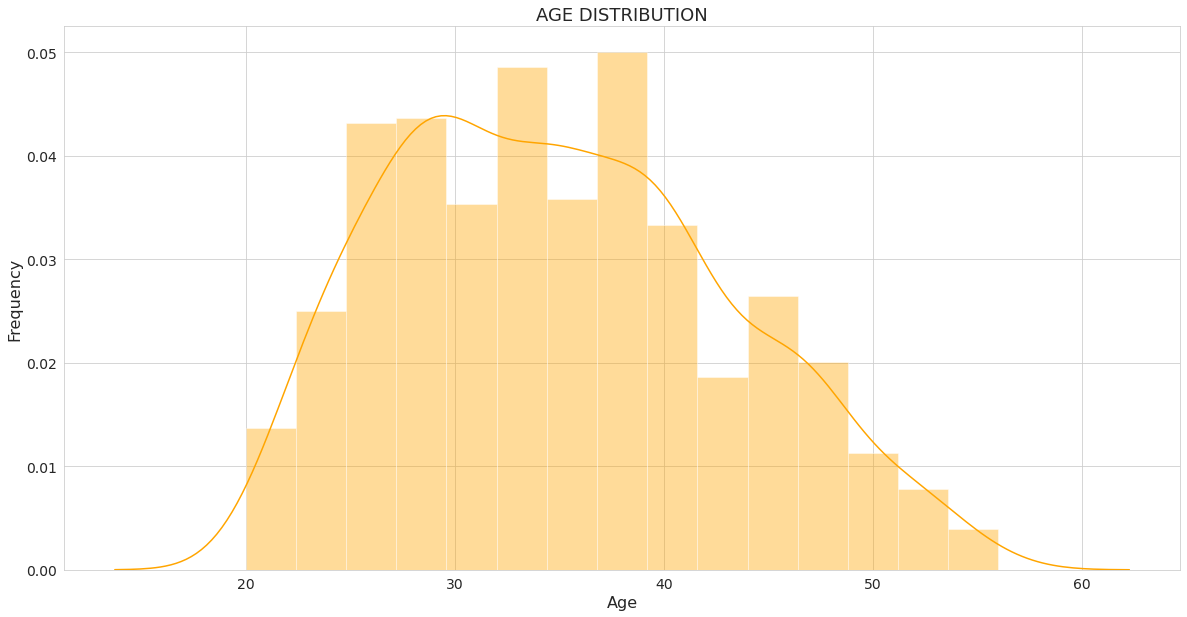

In [8]:
#3. Analizar los datos y encontrar información útil.
#Al ser un caso de distribución, podemos producir un diagrama de distribución para analizarlo de manera más efectiva.
print(cl(df['Age'].describe(), attrs = ['bold']))
sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Edu'}>,
        <Axes: title={'center': 'Years Employed'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Card Debt'}>,
        <Axes: title={'center': 'Other Debt'}>],
       [<Axes: title={'center': 'Defaulted'}>,
        <Axes: title={'center': 'DebtIncomeRatio'}>, <Axes: >]],
      dtype=object)

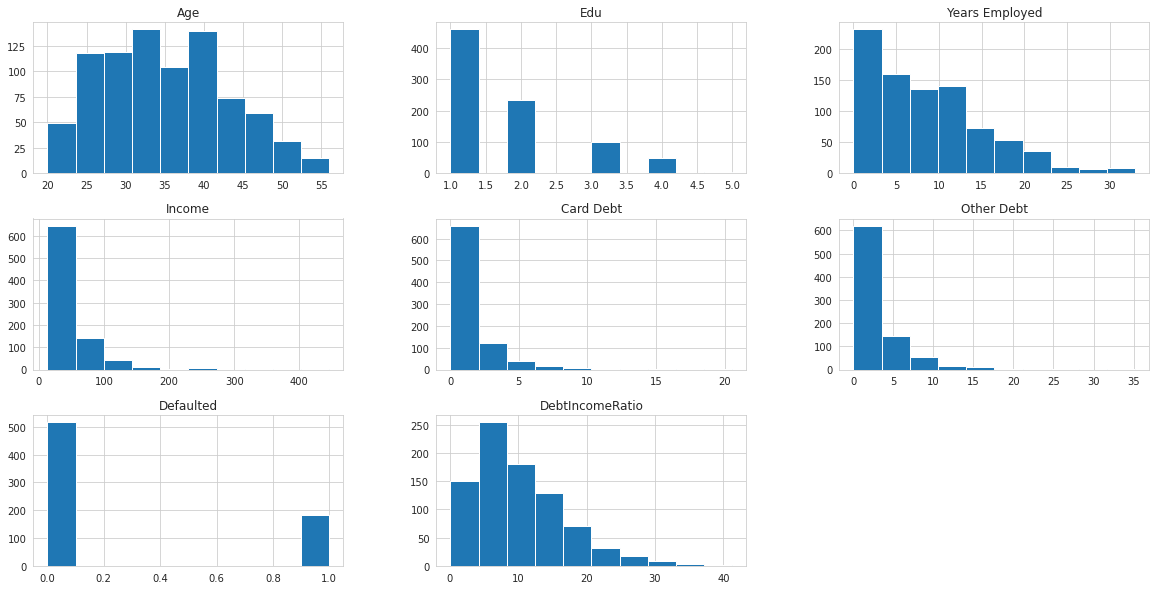

In [9]:
df.hist()

.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


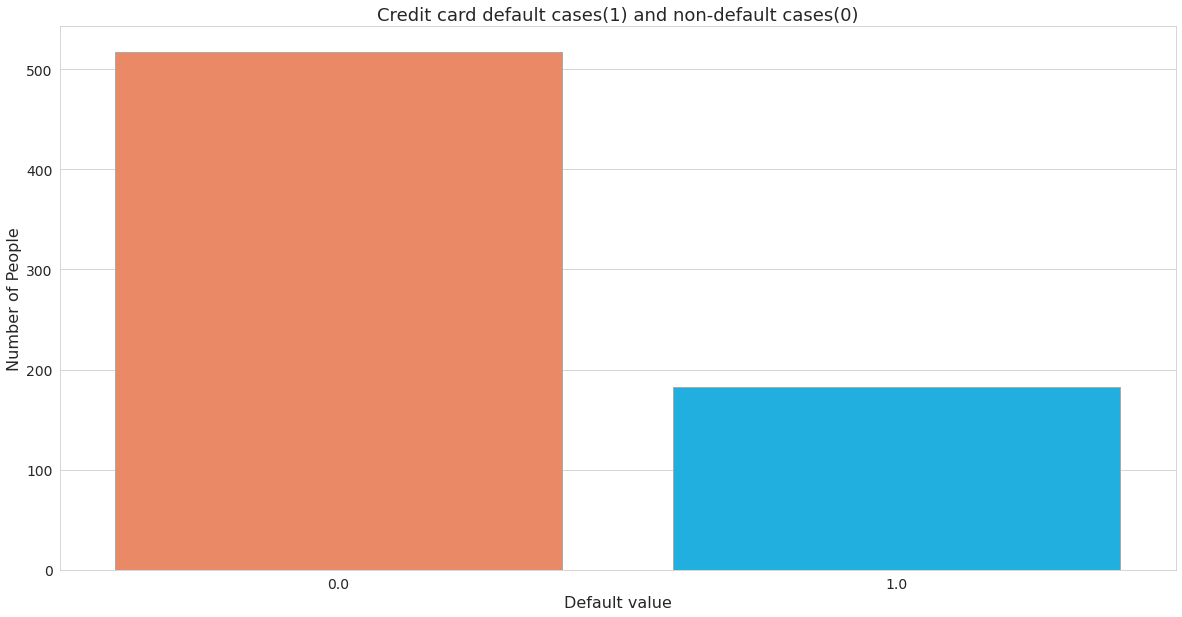

In [10]:
#Al ver el gráfico, podemos entender que la edad con el mayor número de clientes es entre 35 y 40 años y la menor cantidad de clientes entre 50 y 60 años.
# Casos de impago de tarjetas de crédito
default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(x= df['Defaulted'], palette = ['coral', 'deepskyblue'], edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

In [11]:
from pandas._libs.missing import NA
df['Defaulted'].fillna(-1, inplace=True) #el inplace es para que aplique el cambio al df
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [12]:
df.groupby('Defaulted').get_group(1).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000
mean,33.010929,1.901639,5.224044,41.213115,2.423858,3.862814,1.0,14.727869
std,8.517589,0.972788,5.542946,43.115529,3.232490,4.263693,0.0,7.902798
min,20.000000,1.000000,0.000000,14.000000,0.073000,0.161000,1.0,0.900000
25%,27.000000,1.000000,1.000000,21.000000,0.543500,1.318000,1.0,8.550000
50%,31.000000,2.000000,3.000000,29.000000,1.377000,2.530000,1.0,13.800000
75%,39.000000,2.000000,8.000000,45.500000,2.711000,4.651000,1.0,19.350000
max,55.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.0,41.300000


array([[<Axes: title={'center': 'Defaulted'}>]], dtype=object)

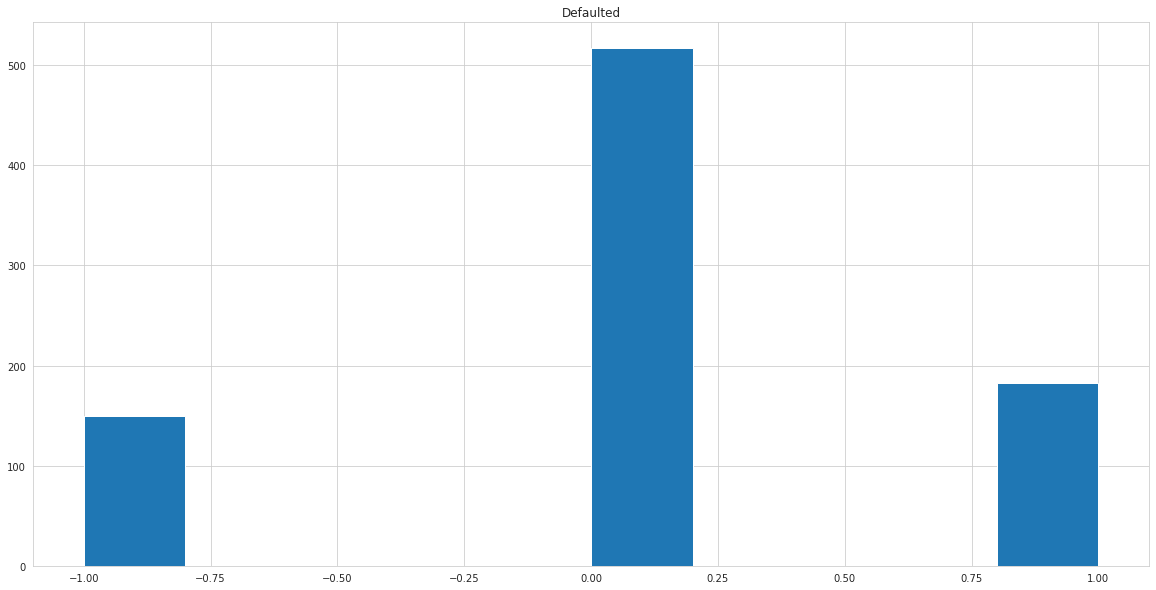

In [13]:
df.hist('Defaulted')

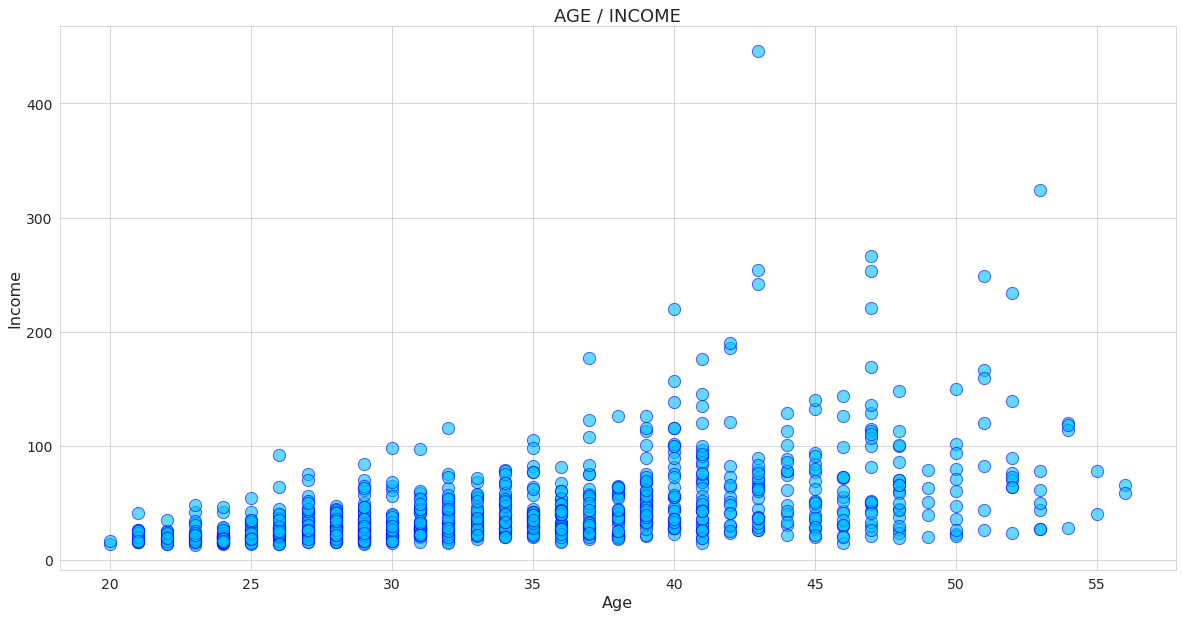

In [14]:
#Ahora, usando un gráfico de dispersión, examinemos la relación entre los atributos 'Edad' e 'Ingresos'.
sb.scatterplot(x='Age', y='Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

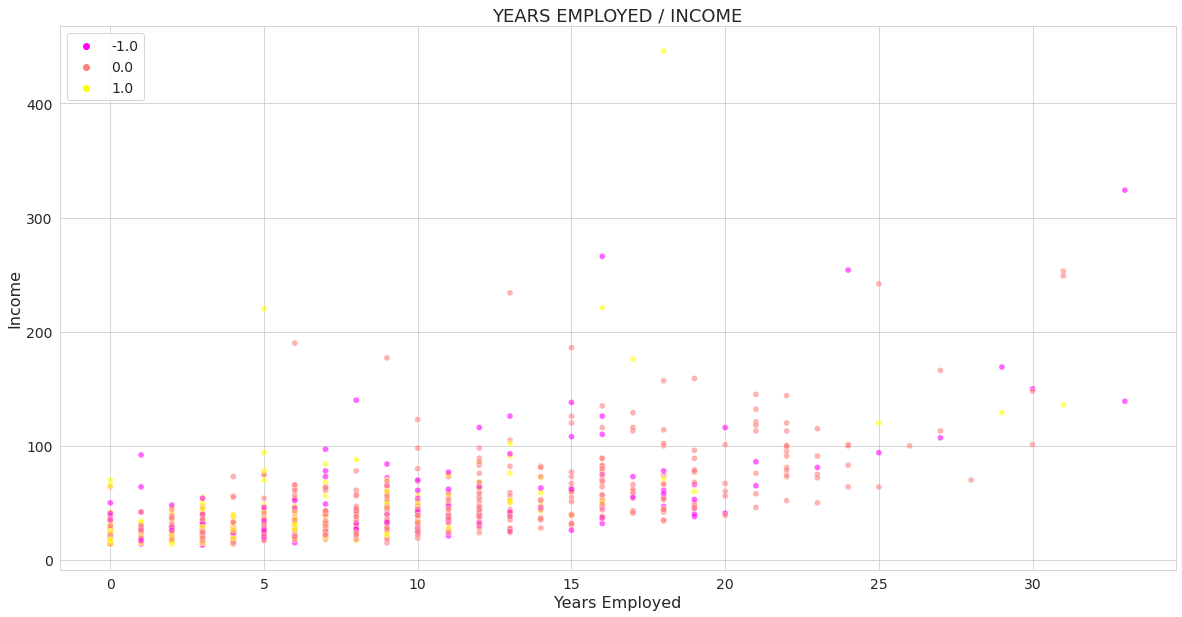

In [15]:
#El gráfico de burbujas que representa los puntos de datos de los atributos 'Ingreso', 'Años empleados' y 'Ratio de ingreso de deuda'. La única diferencia entre el gráfico de dispersión y el gráfico de burbujas es que el gráfico de burbujas representa los puntos de datos de tres atributos, mientras que en el gráfico de dispersión solo se visualizan dos.
area = df.DebtIncomeRatio**2

sb.scatterplot(x='Years Employed', y='Income', 
               data = df,  
               alpha = 0.6, 
               edgecolor = 'white', 
               hue = 'Defaulted', 
               palette = 'spring')
plt.title('YEARS EMPLOYED / INCOME', 
          fontsize = 18)
plt.xlabel('Years Employed', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('y_income.png')
plt.show()

In [16]:
#4. Procesando los datos a nuestras necesidades
#La normalización es un método estadístico que ayuda a los algoritmos matemáticos a interpretar características con diferentes magnitudes y distribuciones por igual.
#Usando la función 'StandardScaler' proporcionada por el paquete scikit-learn, podemos realizar una normalización factible sobre el conjunto de datos en python
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.06214689  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.5386064   1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.06214689 -0.44250653]]


In [17]:
#5.Construyendo el modelo usando el algoritmo K-Means
#La clase KMeans tiene muchos parámetros que se pueden usar, pero usaremos estos tres:
#init - Método de inicialización de los centroides. El valor será: ‘k-means++’. k-means++: selecciona los centros de clúster iniciales para el agrupamiento de k-means de una manera inteligente para acelerar la convergencia.
#n_clusters - El número de clústeres a formar así como el número de centroides a generar. el valor sera 3
#n_init - Número de veces que se ejecutará el algoritmo k-means con semillas de centroide diferentes. Los resultados finales serán la mejor salida de n_init ejecuciones consecutivas en términos de inercia. el valor sera 12
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


In [18]:
#6. Analizando y visualizando el modelo K-Means construido
#Para comenzar a encontrar información útil, debemos agregar un atributo a los datos del cliente que muestre el valor del grupo para cada fila.
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,2
3,33,2,10,57,6.111,5.802,1.0,20.9,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [19]:
#Ahora usemos el método 'agrupar por' para agrupar el valor del clúster y ver el valor medio de cada uno de los atributos en el conjunto de datos usando el método 'media'.
df.groupby('cluster_num').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_num,,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.069337,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.000000,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,-0.065574,10.724590


In [20]:
df.groupby('cluster_num').get_group(2).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0
mean,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,-0.065574,10.724590,2.0
std,6.711752,0.993524,6.551960,23.266265,3.116450,4.627465,0.579945,7.361811,0.0
min,26.000000,1.000000,0.000000,57.000000,0.022000,0.053000,-1.000000,0.100000,2.0
25%,37.000000,1.000000,11.000000,65.000000,1.025000,2.673000,0.000000,5.400000,2.0
50%,41.000000,2.000000,15.000000,76.000000,2.223000,4.695000,0.000000,9.200000,2.0
75%,46.000000,3.000000,20.000000,98.500000,4.033000,7.823000,0.000000,14.350000,2.0
max,56.000000,5.000000,33.000000,150.000000,20.561000,35.197000,1.000000,41.300000,2.0


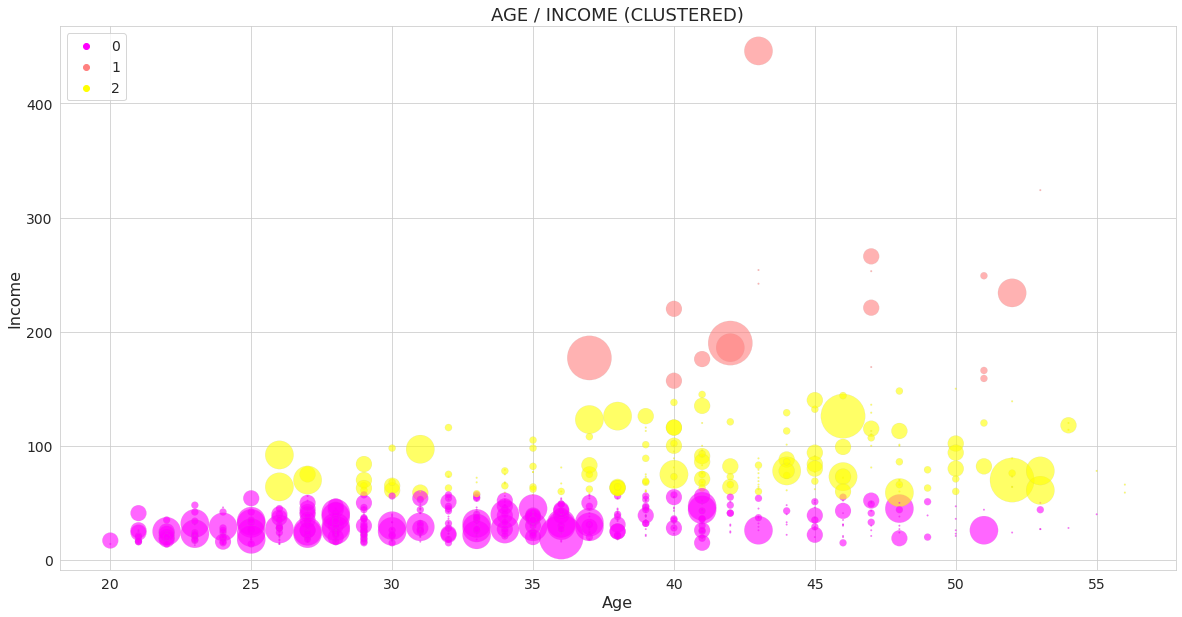

In [21]:
#Veamos la distribución de clientes en función de su edad e ingresos utilizando un gráfico de burbujas y el color representa el valor del grupo.
area = np.pi * (df.Edu) ** 4

sb.scatterplot(x='Age', y='Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOME (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()

In [22]:
kmeans_kwargs={
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":2023
}
sse=[]
for k in range (1,20):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(cluster_data)
  sse.append(kmeans.inertia_)

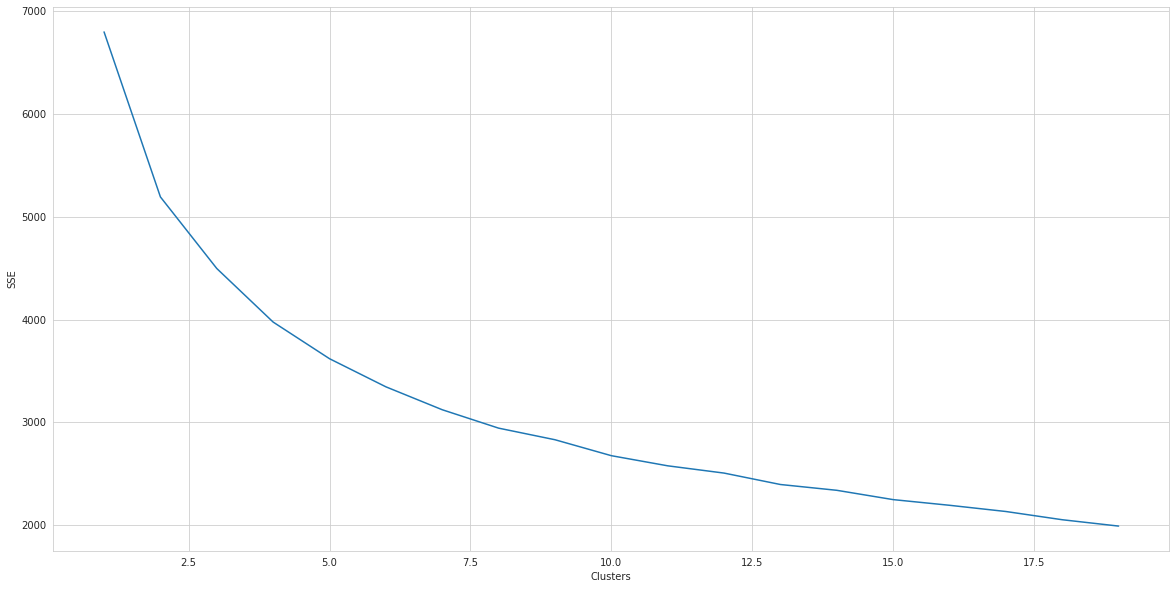

In [23]:
plt.plot(range(1,20),sse)
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
! pip install kneed


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from kneed import KneeLocator

In [26]:
kl=KneeLocator(range(1,20),sse, curve="convex", direction="decreasing")
kl.elbow

6

In [27]:
#Nuestro modelo K-Means ha dividido a los clientes en grupos mutuamente excluyentes, que son tres grupos en nuestro caso. Los clientes de cada grupo son similares entre sí desde el punto de vista demográfico. Ahora podemos crear un perfil para cada grupo, considerando las características comunes de cada clúster.